In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import warnings
from scipy import signal
import pywt
import scaleogram as scg # had to replace np.int to np.int64 in module in order to draw plots.
scg.set_default_wavelet('cmor1-1.5')
# pip install scaleogram
# pip install PyWavelets


C:\Users\Hot Mexican\AppData\Local\Temp\ipykernel_19500\1740765299.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd, numpy as np, matplotlib.pyplot as plt


The el-Nino dataset is a time-series dataset used for tracking the El Nino and contains quarterly measurements of the sea surface temperature from 1871 up to 1997.

In [2]:
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
vals = np.array(df_nino.values).flatten()
time = np.linspace(1871,1997, len(vals))

Calculate locally averaged signal using convolution of an averaging kernel: $k =\frac{[1,1,1]}{\sum [1,1,1]} = [1/3,1/3,1/3]$

In [3]:
mean_steps = 10
vals_mean = signal.convolve(vals, np.ones(mean_steps)/mean_steps, mode='valid')
time_mean = signal.convolve(time, np.ones(mean_steps)/mean_steps, mode='valid')

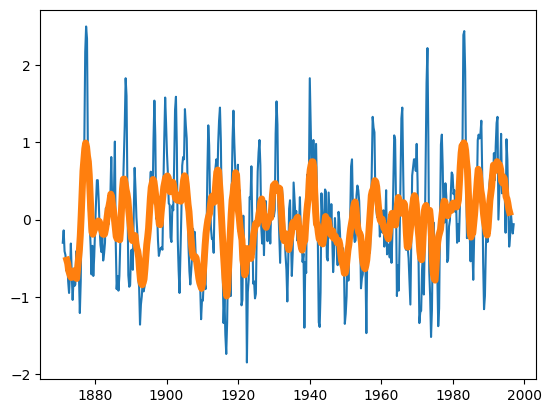

In [4]:
plt.plot(time,vals)
plt.plot(time_mean,vals_mean, lw = 5)

c:\Users\Hot Mexican\VS_Code_Proj\.venv\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


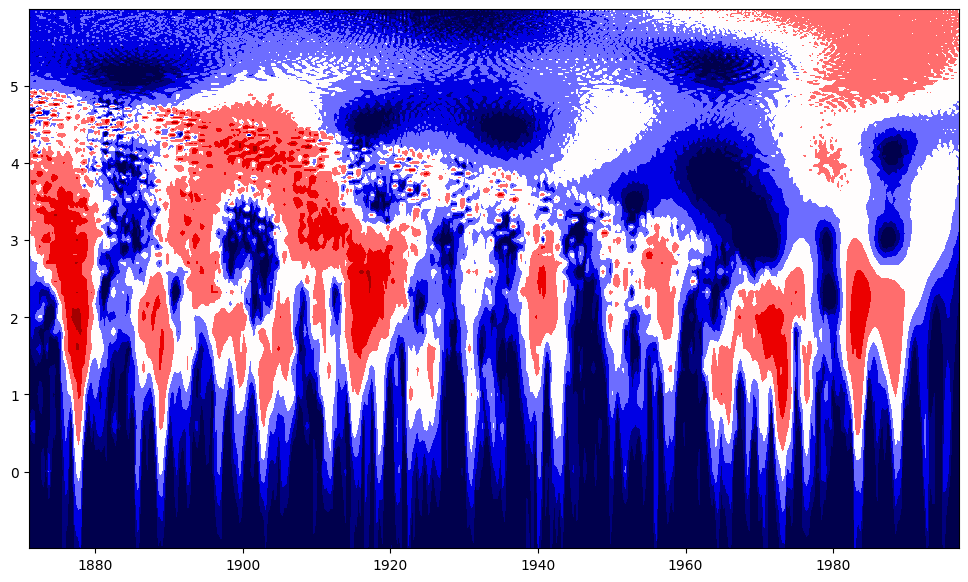

In [5]:
[coefficients, frequencies] = pywt.cwt(vals, np.arange(1, 128), 'cmor', time_mean[1]- time_mean[0])
power = (abs(coefficients)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)

fig, ax = plt.subplots(figsize=(12, 7))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=plt.cm.seismic)


Text(0, 0.5, 'freq')

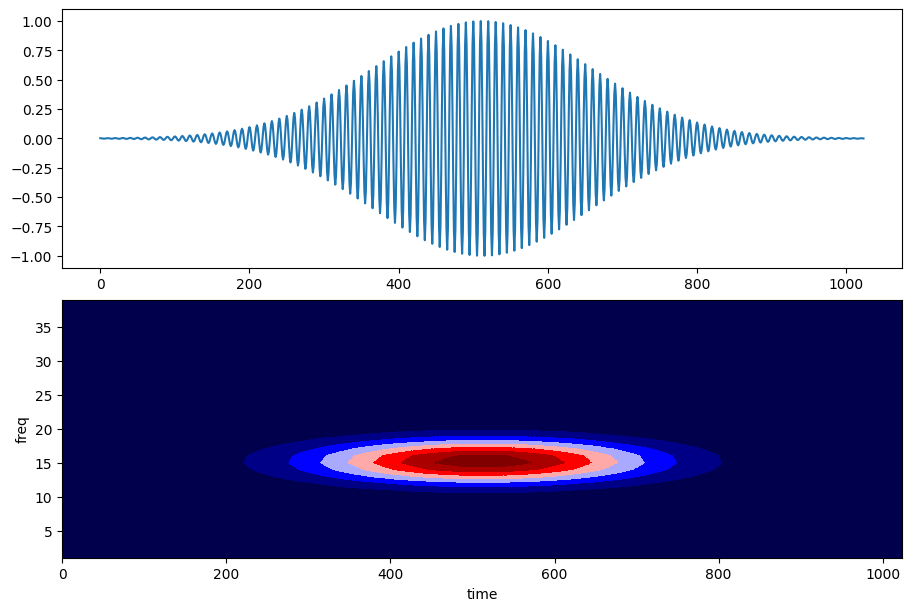

In [6]:
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
ns = 1024
time = np.arange(ns)
scales_max = 40
scales = scg.periods2scales(np.arange(1,scales_max))

period1 = 10;
omega1 = 2*np.pi/period1
gauss_stdev = ns // 5
periodic1 = np.cos(omega1*time) * np.exp(-((time - ns//2)/gauss_stdev)**2)
fig, axes = plt.subplots(2,1, figsize = (9,6), layout='constrained')
axes[0].plot(time, periodic1)

wavelet = 'cmor1-1.5'
scales = np.arange(1,scales_max)
[coefficients, frequencies] = pywt.cwt(periodic1, scales, wavelet, sampling_period=1)

freqs = pywt.scale2frequency(wavelet, scales) / 1
axes[1].contourf(time, scales, np.abs(coefficients),  extend='both',cmap=plt.cm.seismic)
axes[1].set_xlabel('time')
axes[1].set_ylabel('freq')

Text(0, 0.5, 'freq')

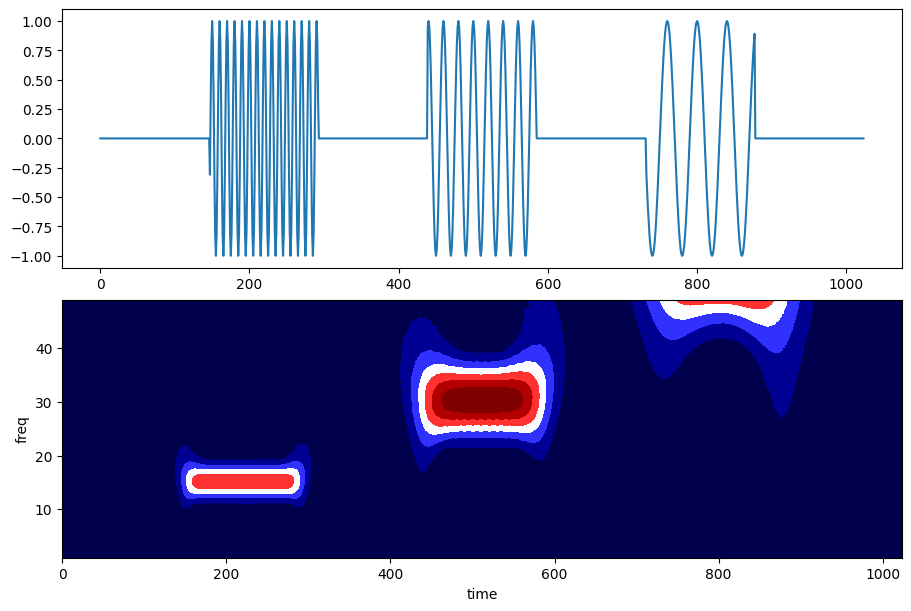

In [7]:
pulses = np.zeros(ns, dtype=np.float32)
steps  = np.linspace(0, ns, 8)
periods = [10, 20, 40]
for i in range(0,3):
    step_mask = (time > steps[i*2+1]) & (time < steps[i*2+2])
    pulses += np.cos(2*np.pi/periods[i]*time) * step_mask


fig, axes = plt.subplots(2,1, figsize = (9,6), layout='constrained')
axes[0].plot(pulses)
wavelet = 'cmor1-1.5'
scales_max = 50
scales = np.arange(1,scales_max)
[coefficients, frequencies] = pywt.cwt(pulses, scales, wavelet, sampling_period=1)

freqs = pywt.scale2frequency(wavelet, scales) / 1
axes[1].contourf(np.arange(0,ns), scales, np.abs(coefficients),  extend='both',cmap=plt.cm.seismic)
axes[1].set_xlabel('time')
axes[1].set_ylabel('freq')

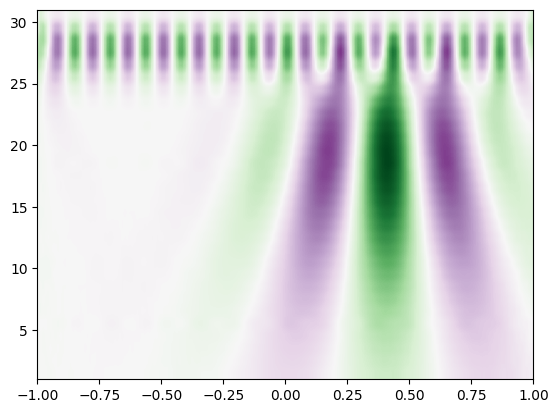

In [8]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 

[Continuous Wavelet Transform (CWT) of 1-D Signals using Python and MATLAB](https://youtu.be/qoMDpSatG7M?t=964)

In [9]:
import pywt, numpy as np, matplotlib.pyplot as plt

(38, 600)


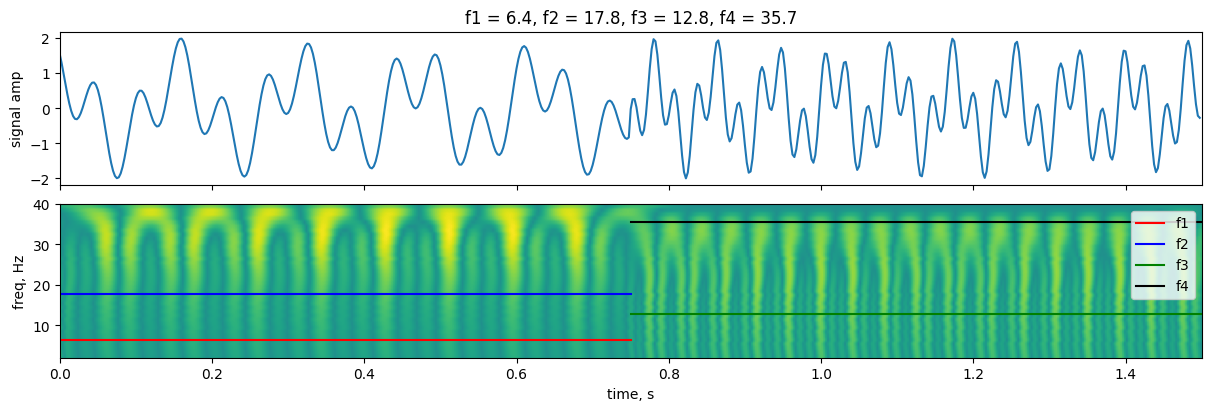

In [10]:
np.random.seed(0)
freq_bound_low  = 2
freq_bound_mid  = 10
freq_bound_hi   = 20

f1 = np.random.uniform(freq_bound_low   , freq_bound_mid)
f2 = np.random.uniform(f1 + 6           , freq_bound_hi )

f3 = 2 * f1
f4 = 2 * f2
time_max = 3/freq_bound_low # 3 periods
wavelet = 'gaus1'#'morl'
sampling_step = 1 / freq_bound_hi / 20

t = np.arange(0,time_max, sampling_step)
transition_idx = len(t)//2
t1 = t[:transition_idx]
t2 = t[transition_idx:]

signal1 = np.cos(2*np.pi*f1*t1) + np.cos(2*np.pi*f2*t1+1)
signal2 = np.cos(2*np.pi*f3*t2) + np.cos(2*np.pi*f4*t2+1)
signal = np.concatenate((signal1, signal2))
sampling_rate = 1 / sampling_step

frequencies = np.arange(2*freq_bound_hi, freq_bound_low,-1) / sampling_rate

scales = pywt.frequency2scale(wavelet, frequencies)
#scales_max_min = np.array( [np.ceil(np.max(scales)), np.min(scales)], int)

coef, freqs = pywt.cwt(signal,scales, wavelet)
coef_abs = np.abs(coef);print(coef_abs.shape)

fig, ax = plt.subplots(2,1, figsize = (12,4), layout='constrained', sharex=True)
ax[0].plot(t,signal)
ax[0].set_title(f'f1 = {f1:0.1f}, f2 = {f2:0.1f}, f3 = {f3:0.1f}, f4 = {f4:0.1f}')
ax[0].set_ylabel('signal amp')
ax[1].imshow(coef_abs, extent=[0,time_max,2*freq_bound_hi, freq_bound_low],vmax=coef_abs.max(), vmin=-coef_abs.max(), aspect = 'auto') 
ax[1].axhline(xmin=0     , xmax = 0.5   , y = f1, color='r', label='f1')
ax[1].axhline(xmin=0     , xmax = 0.5   , y = f2, color='b', label='f2')
ax[1].axhline(xmin = 0.5                , y = f3, color='g', label='f3')
ax[1].axhline(xmin = 0.5                , y = f4, color='k', label='f4')
ax[1].legend()
ax[1].set_xlabel('time, s')
ax[1].set_ylabel('freq, Hz')

plt.gca().invert_yaxis()

dt = 0.0006666666666666668
frequencies = [11 10  9  8  7  6  5  4  3  2  1]
frequencies_normed = [0.00733333 0.00666667 0.006      0.00533333 0.00466667 0.004
 0.00333333 0.00266667 0.002      0.00133333 0.00066667]
scales = [ 204  224  249  281  321  375  449  562  750 1124 2249]


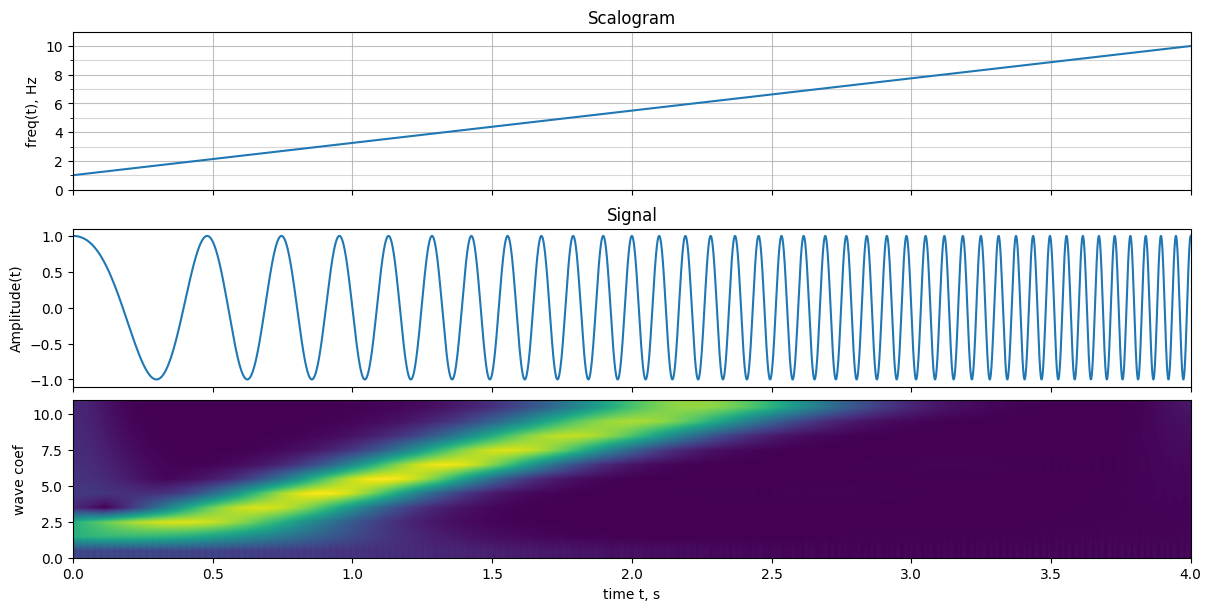

Wavelet widths in % of data len [0.5452424595900683, 0.5997333777703716, 0.6663889351774704, 0.7497083819363439, 0.8568571904682553, 0.9998333611064822, 1.199633394434261, 1.4995834027662056, 1.9996667222129645, 2.999333444425929, 5.998833527745376]


In [11]:
import pywt, numpy as np, matplotlib.pyplot as plt

def linear(t1, f1, t2, f2, t):
    'eq of line of t that passes through points (t1,f1) & (t2,f2)'
    slope = (f2 - f1) / (t2 - t1)
    intercept = f1 - slope * t1
    return slope * t + intercept

fig, ax = plt.subplots(3,1, figsize = (12,6), layout='constrained', sharex=True)
# generate a signal
f1,f2   = 1,10 
f_max_min = [f2 + 1     , max(0,f1-1)]
f_min_max = [max(0,f1-1), f2 + 1     ]

tmax    = 4/f1          # 4 largest periods
dt      = 1 / f2 / 150   # N parts of smallest period
print(f'dt = {dt}')
t       = np.arange(0, tmax+0.0000001, dt)
freq_t  = linear(0, f1, tmax, f2, t)

ax[0].plot(t,freq_t)
ax[0].set_ylim(f_min_max)
ax[0].set_yticks(np.arange(*f_min_max, 2))
ax[0].set_yticks(np.arange(*f_min_max, 1), minor=True)
ax[0].grid(which='major', alpha=0.8)
ax[0].grid(which='minor', alpha=0.5)
ax[0].set_ylabel('freq(t), Hz')
ax[0].set_title('Linear increase in singla frequency')
signal  = np.cos(2*np.pi*freq_t*t)

ax[1].plot(t,signal)
ax[1].set_ylabel('Amplitude(t)')
ax[1].set_title('Signal')

# wavelet stuff
frequencies = np.arange(*f_max_min,-1)
frequencies_normed = frequencies * dt
print(f'frequencies = {frequencies}\nfrequencies_normed = {frequencies_normed}')
wavelet = 'cmor1-1.5'

scales = pywt.frequency2scale(wavelet, frequencies_normed)

print(f'scales = {scales.astype(int)}')
coef, freqs = pywt.cwt(signal,scales, wavelet)
coef_abs = np.abs(coef)#;print(coef_abs.shape)

ax[2].imshow(coef_abs, extent=[0, tmax, *f_min_max], aspect = 'auto', interpolation='bilinear') 
ax[2].set_ylabel('wave coef')
ax[2].set_xlabel('time t, s')
ax[0].set_title('Scalogram')
plt.show()
wav = pywt.ContinuousWavelet(wavelet)
print("Wavelet widths in % of data len", [int(s*(wav.upper_bound- wav.lower_bound))/len(t) for s in scales])
#pywt.wavelist(kind='continuous')


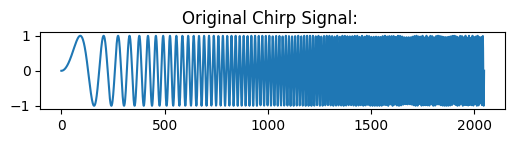

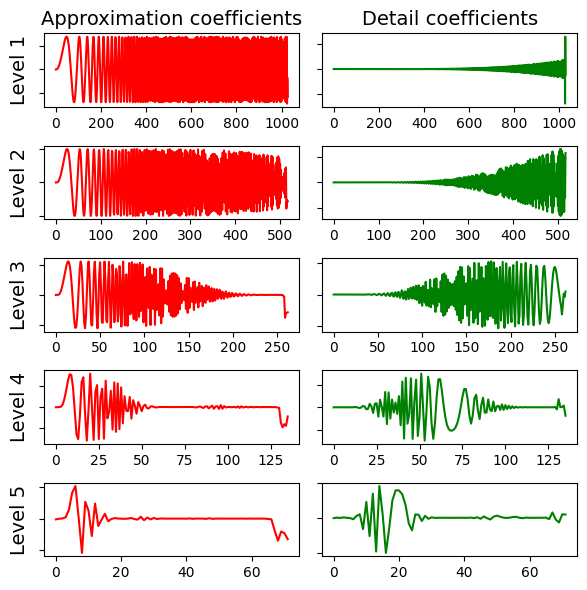

In [12]:
import pywt

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

In [10]:

lower = np.tril(M, -1)
upper = np.triu(M, 1)
diag = np.diag(M)
print(upper, '\n\n',diag, '\n\n', lower)

[[0 2 3]
 [0 0 6]
 [0 0 0]] 

 [1 5 9] 

 [[0 0 0]
 [4 0 0]
 [7 8 0]]


In [13]:
upper - 6

array([[-6, -4, -3],
       [-6, -6,  0],
       [-6, -6, -6]])

matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
upper triangle:  [2 3 6]
lower triangle:  [4 7 8]
diagonal elements:  [1 5 9]
